In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator

In [29]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [31]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [32]:
df.duplicated().sum()

0

In [33]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [34]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [35]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [36]:
df.rename(columns={
        'race/ethnicity': 'race',
        'parental level of education': 'parent_education',
        'test preparation course': 'test_preparation_course',
        'math score': 'math_score', 
        'reading score': 'reading_score',
        'writing score': 'writing_score',
    }, inplace=True
)


In [37]:
df.columns

Index(['gender', 'race', 'parent_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [38]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [39]:
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()
math_full = df[df['math_score'] == 100]['math_score'].count()

print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Math: {math_full}')

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [40]:
pass_grade = 50

df['pass_math'] = 'yes'
filt = (df['math_score'] < pass_grade)
df.loc[filt,'pass_math'] = 'no'
df[['math_score', 'pass_math']].head()

df['pass_reading'] = 'yes'
filt = (df['reading_score'] < pass_grade)
df.loc[filt,'pass_reading'] = 'no'
df[['reading_score', 'pass_reading']].head()

df['pass_writing'] = 'yes'
filt = (df['writing_score'] < pass_grade)
df.loc[filt,'pass_writing'] = 'no'
df[['writing_score', 'pass_writing']].head()

df

,gender,race,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score,pass_math,pass_reading,pass_writing
0,female,group B,bachelor's degree,standard,none,72,72,74,yes,yes,yes
1,female,group C,some college,standard,completed,69,90,88,yes,yes,yes
2,female,group B,master's degree,standard,none,90,95,93,yes,yes,yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,no,yes,no
4,male,group C,some college,standard,none,76,78,75,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,yes,yes,yes
996,male,group C,high school,free/reduced,none,62,55,55,yes,yes,yes
997,female,group C,high school,free/reduced,completed,59,71,65,yes,yes,yes
998,female,group D,some college,standard,completed,68,78,77,yes,yes,yes


In [41]:
pass_math_count = df.groupby('pass_math')['pass_math'].count()
pass_math_count

pass_math
no     135
yes    865
Name: pass_math, dtype: int64

Average score in Math : 66.089
Average score in Reading : 69.169
Average score in Writing : 68.054




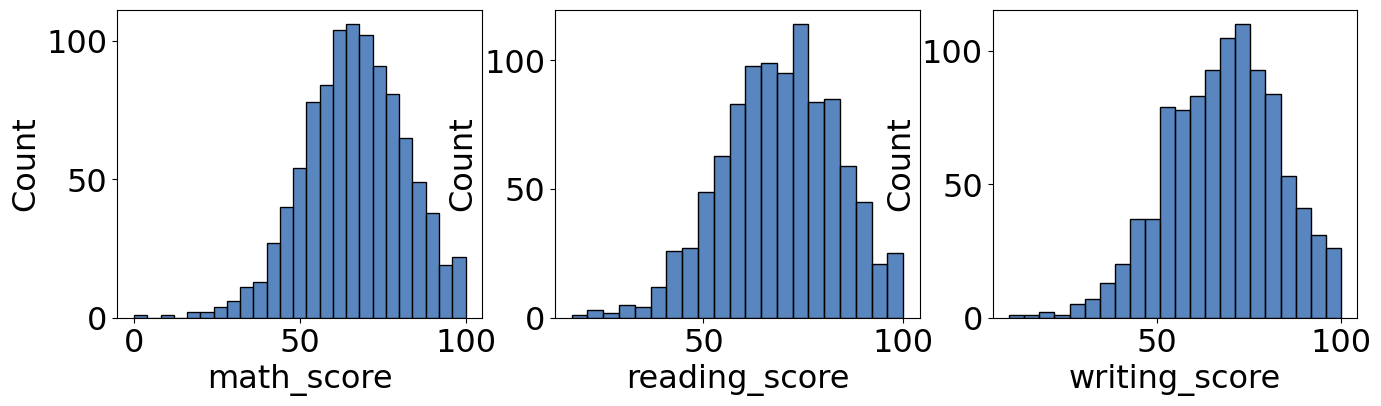

In [42]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))

#ax
sns.histplot(x = 'math_score', data = df, ax = ax[0], color = '#225ea8')
sns.histplot(x = 'reading_score', data = df, ax = ax[1], color = '#225ea8')
sns.histplot(x = 'writing_score', data = df, ax = ax[2], color = '#225ea8')


math_mean = df['math_score'].mean()
reading_mean = df['reading_score'].mean()
writing_mean = df['writing_score'].mean()

print(f'Average score in Math : { math_mean }\nAverage score in Reading : { reading_mean }\nAverage score in Writing : { writing_mean }\n\n')
plt.show()

pass_math
no     135
yes    865
Name: pass_math, dtype: int64
pass_reading
no      90
yes    910
Name: pass_reading, dtype: int64
pass_writing
no     114
yes    886
Name: pass_writing, dtype: int64


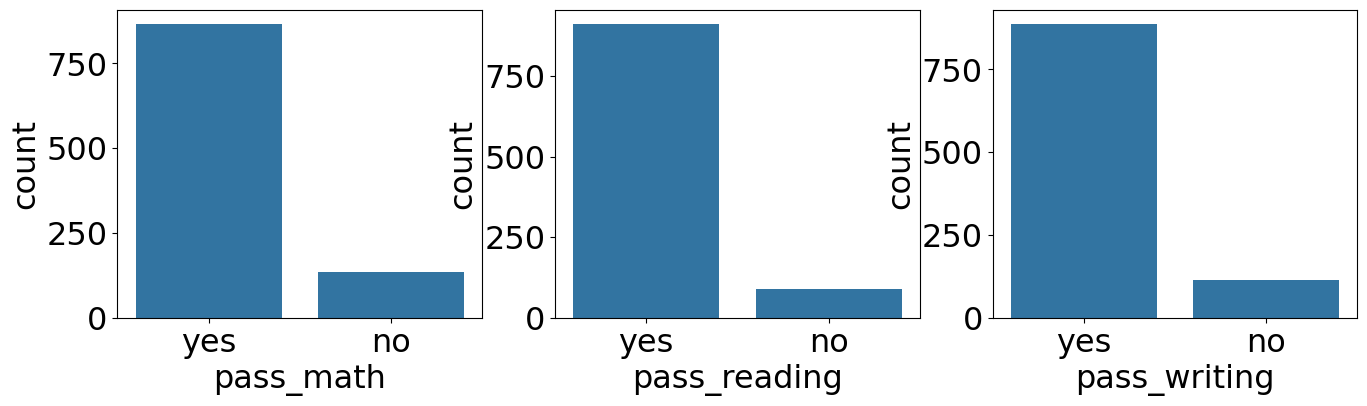

In [43]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))

sns.countplot(x = 'pass_math', data = df, ax = ax[0])
sns.countplot(x = 'pass_reading', data = df, ax = ax[1])
sns.countplot(x = 'pass_writing', data = df, ax = ax[2])

pass_math_count = df.groupby('pass_math')['pass_math'].count()
print(pass_math_count)
pass_math_count = df.groupby('pass_reading')['pass_reading'].count()
print(pass_math_count)
pass_math_count = df.groupby('pass_writing')['pass_writing'].count()
print(pass_math_count)

plt.show()

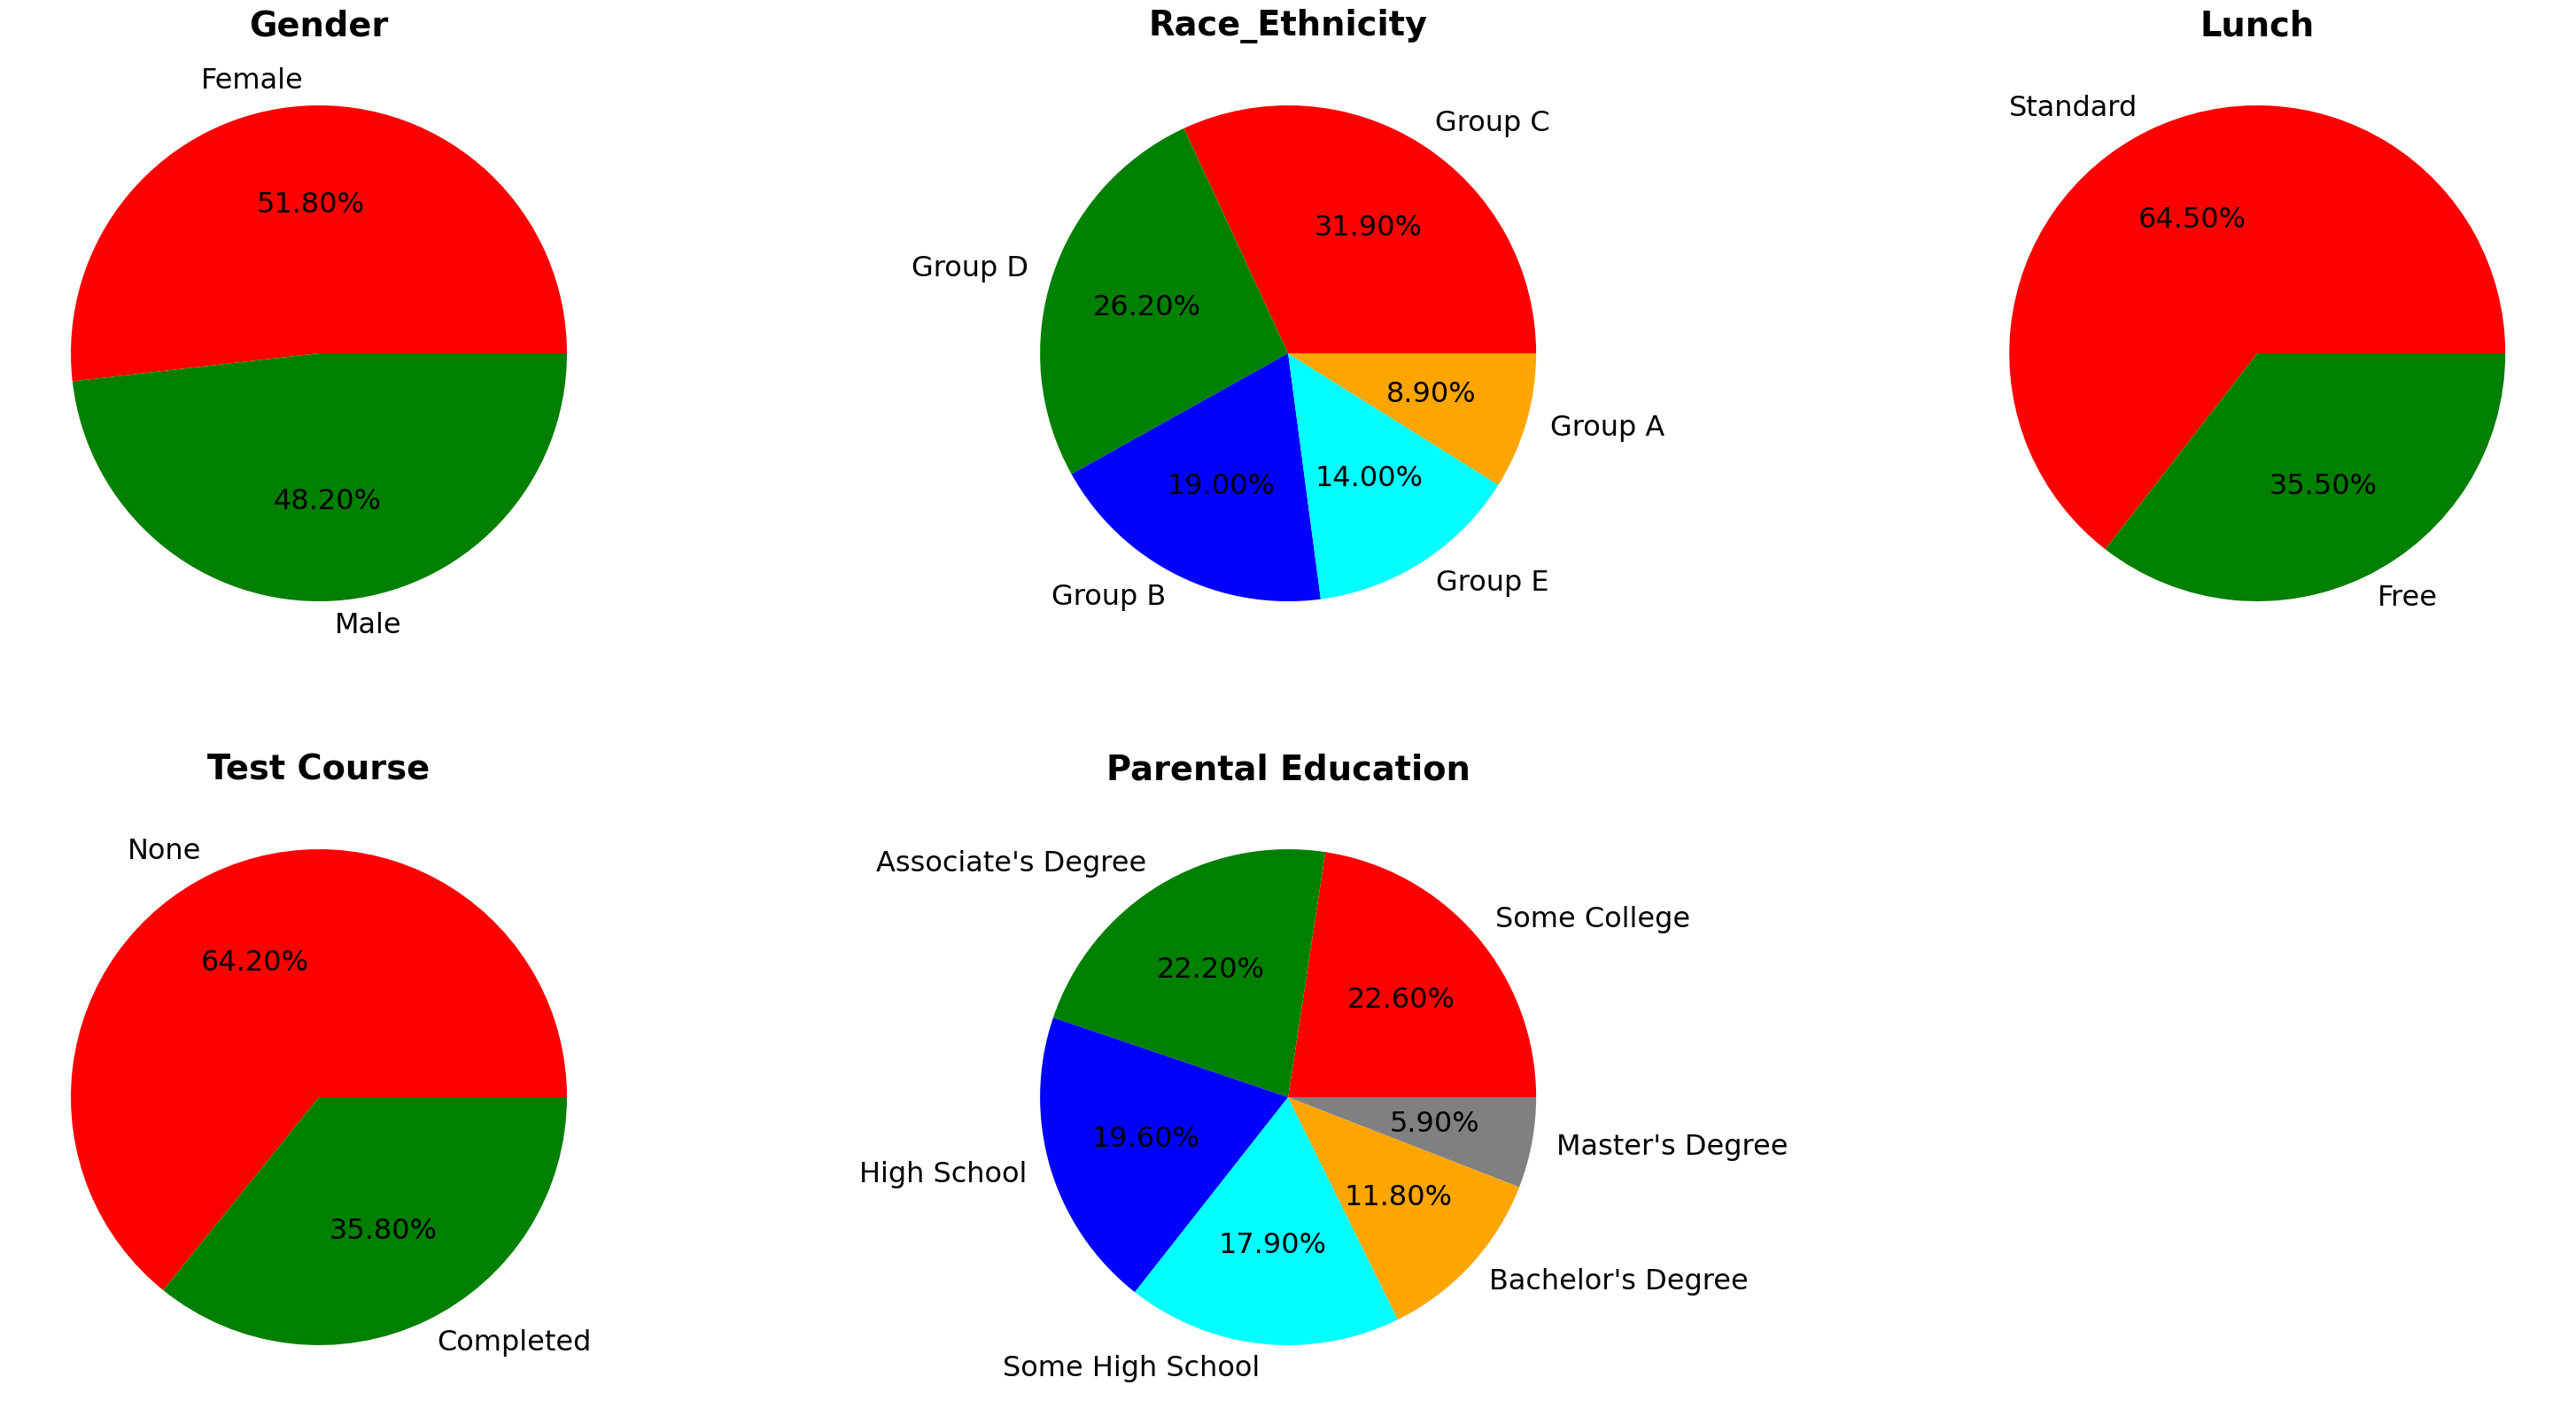

In [44]:
plt.rcParams['figure.figsize'] = (40, 20)
plt.rcParams['font.size'] = 23

plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
#print(size)
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontweight='bold')


plt.subplot(2, 3, 2)
size = df['race'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels, autopct = '%.2f%%')
plt.title('Race_Ethnicity', fontweight='bold')


plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontweight='bold')


plt.subplot(2, 3, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels, autopct = '%.2f%%')
plt.title('Test Course',fontweight='bold')


plt.subplot(2, 3, 5)
size = df['parent_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels, autopct = '%.2f%%')
plt.title('Parental Education', fontweight='bold')


plt.show()

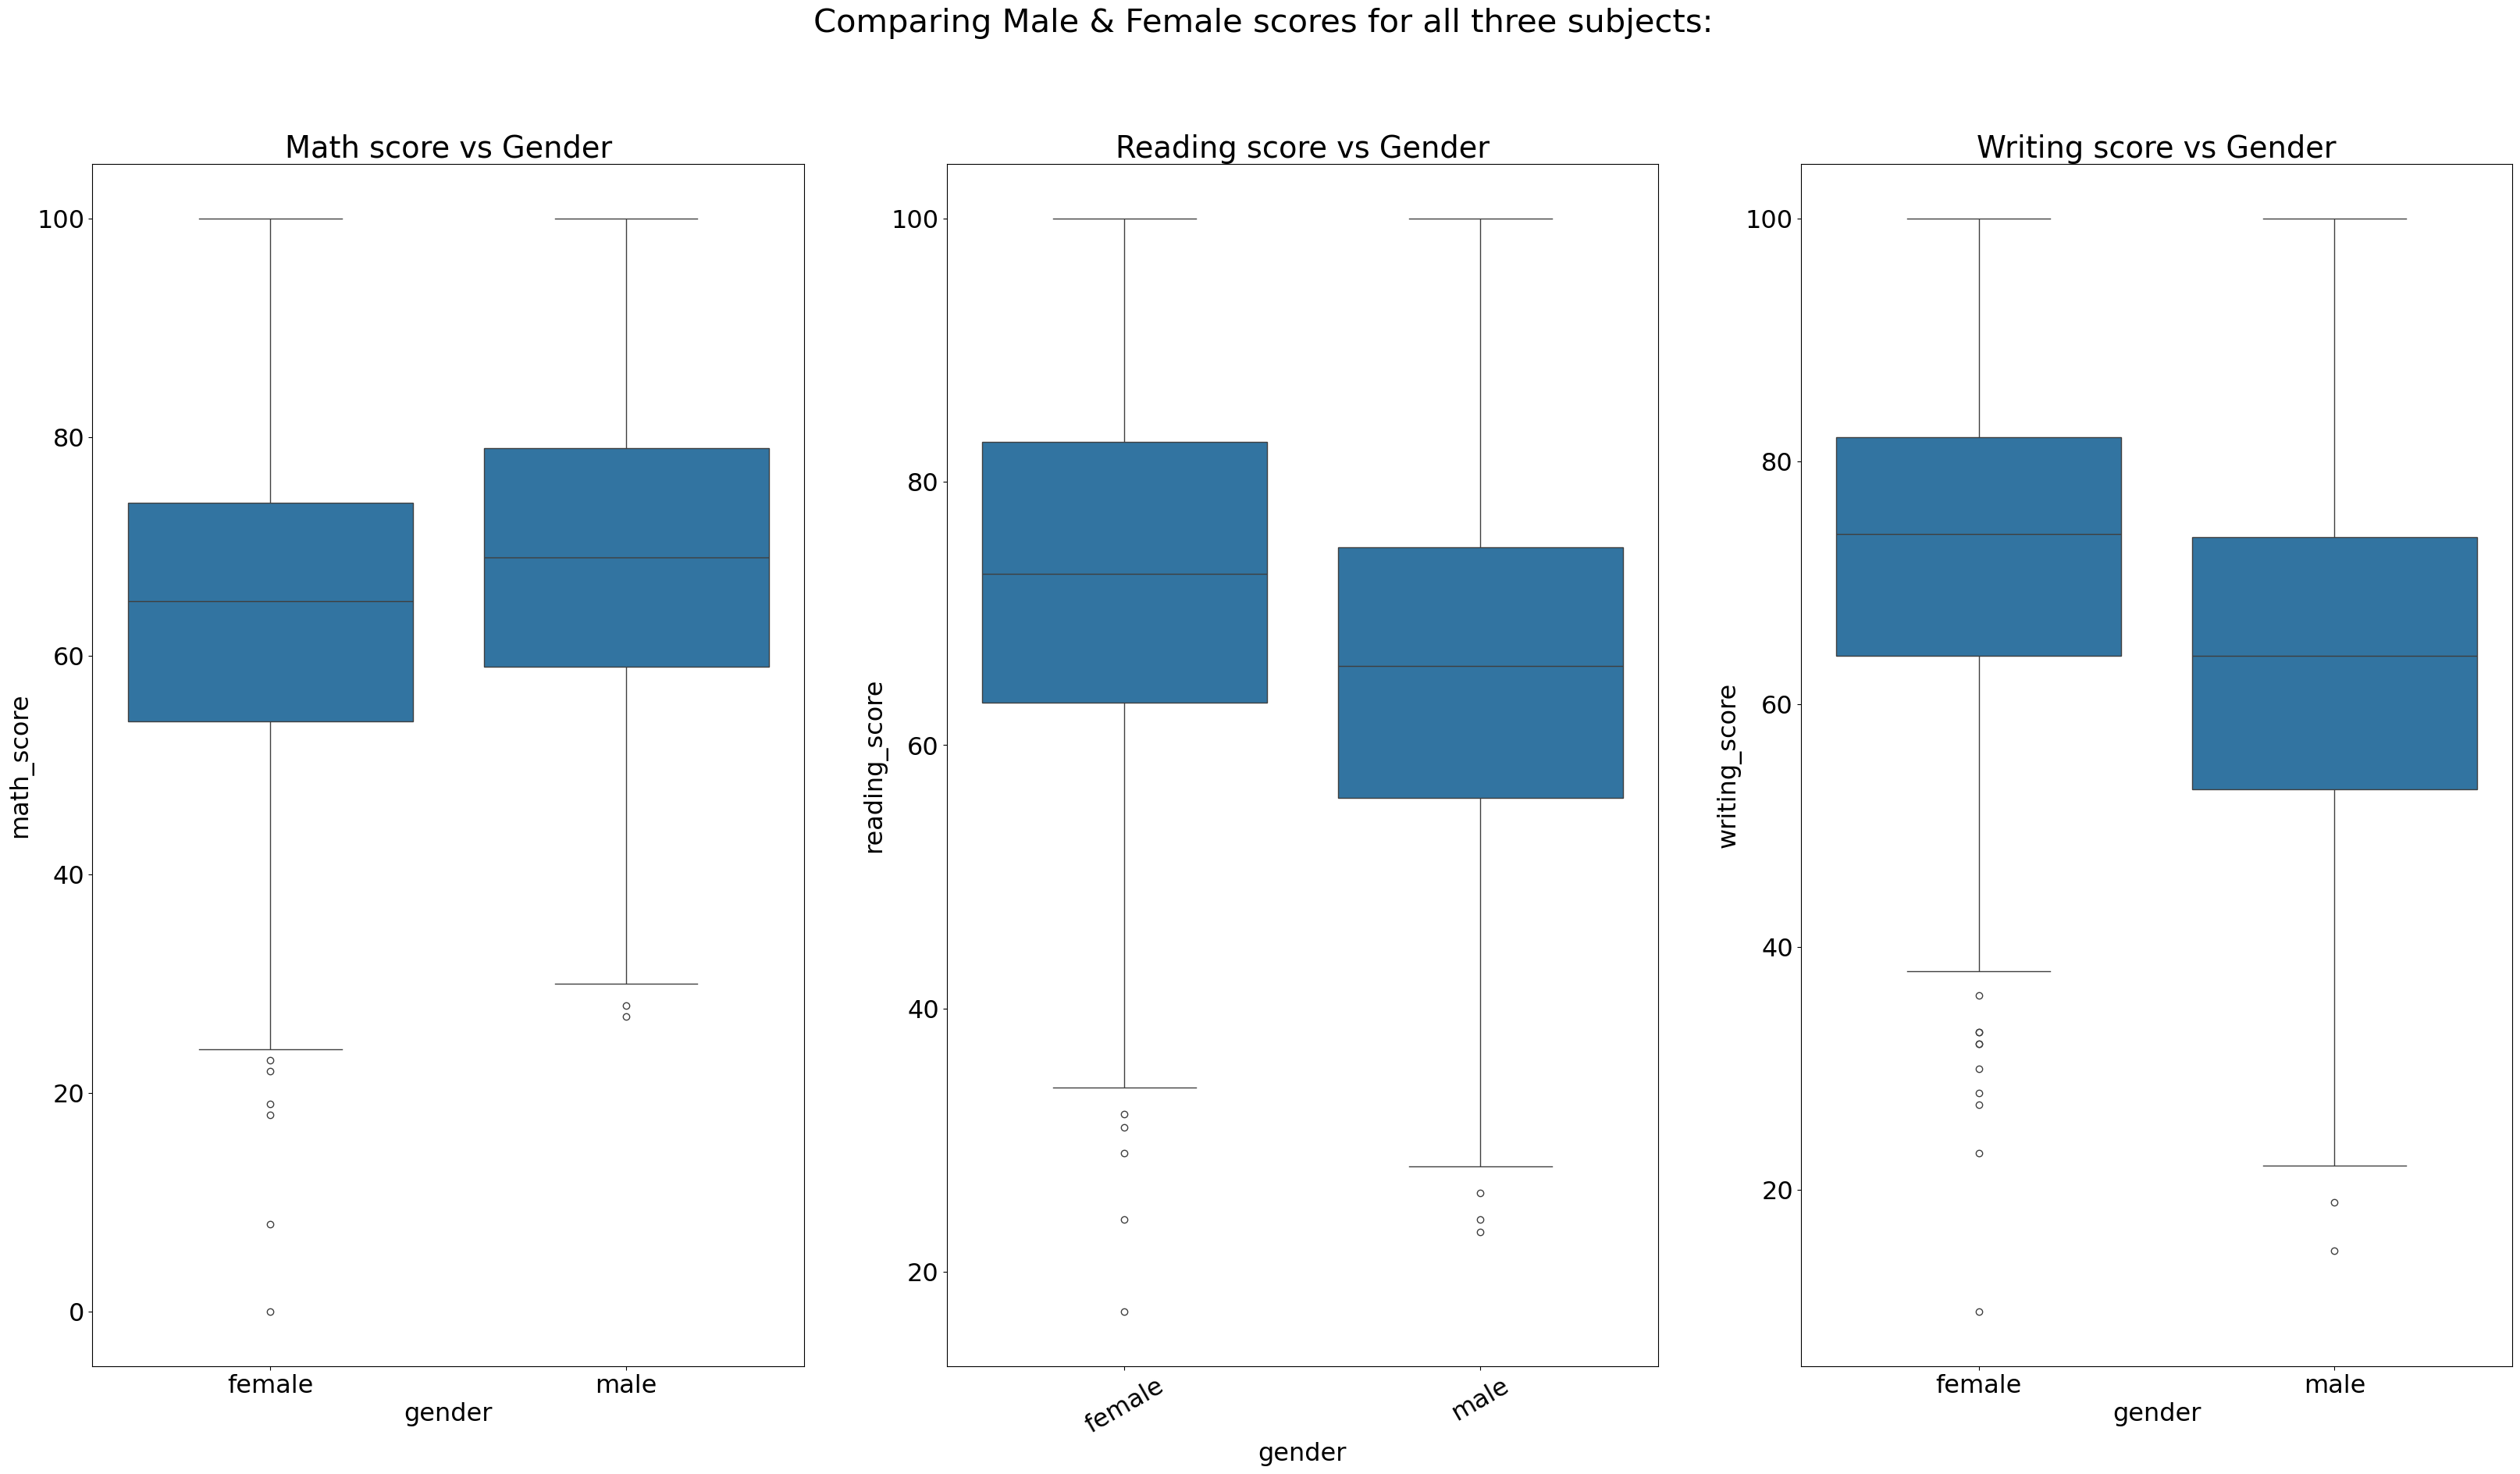

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Comparing Male & Female scores for all three subjects:', fontsize=30) 
# Math score
sns.boxplot(x='gender', y='math_score', data=df, ax=ax1)
ax1.title.set_text('Math score vs Gender')


# Reading Score 
sns.boxplot(x='gender', y='reading_score', data=df, ax=ax2)
ax2.title.set_text('Reading score vs Gender')
ax2.set_xticks(ax2.get_xticks())  # تعيين العلامات
ax2.xaxis.set_major_locator(FixedLocator(ax2.get_xticks()))  # استخدام FixedLocator
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)  # تدوير العلامات

# Writing Score
sns.boxplot(x='gender', y='writing_score', data=df, ax=ax3)
ax3.title.set_text('Writing score vs Gender')

C:\Users\ALDALEEL\AppData\Local\Temp\ipykernel_15824\77169462.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
C:\Users\ALDALEEL\AppData\Local\Temp\ipykernel_15824\77169462.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
C:\Users\ALDALEEL\AppData\Local\Temp\ipykernel_15824\77169462.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var3 = ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)


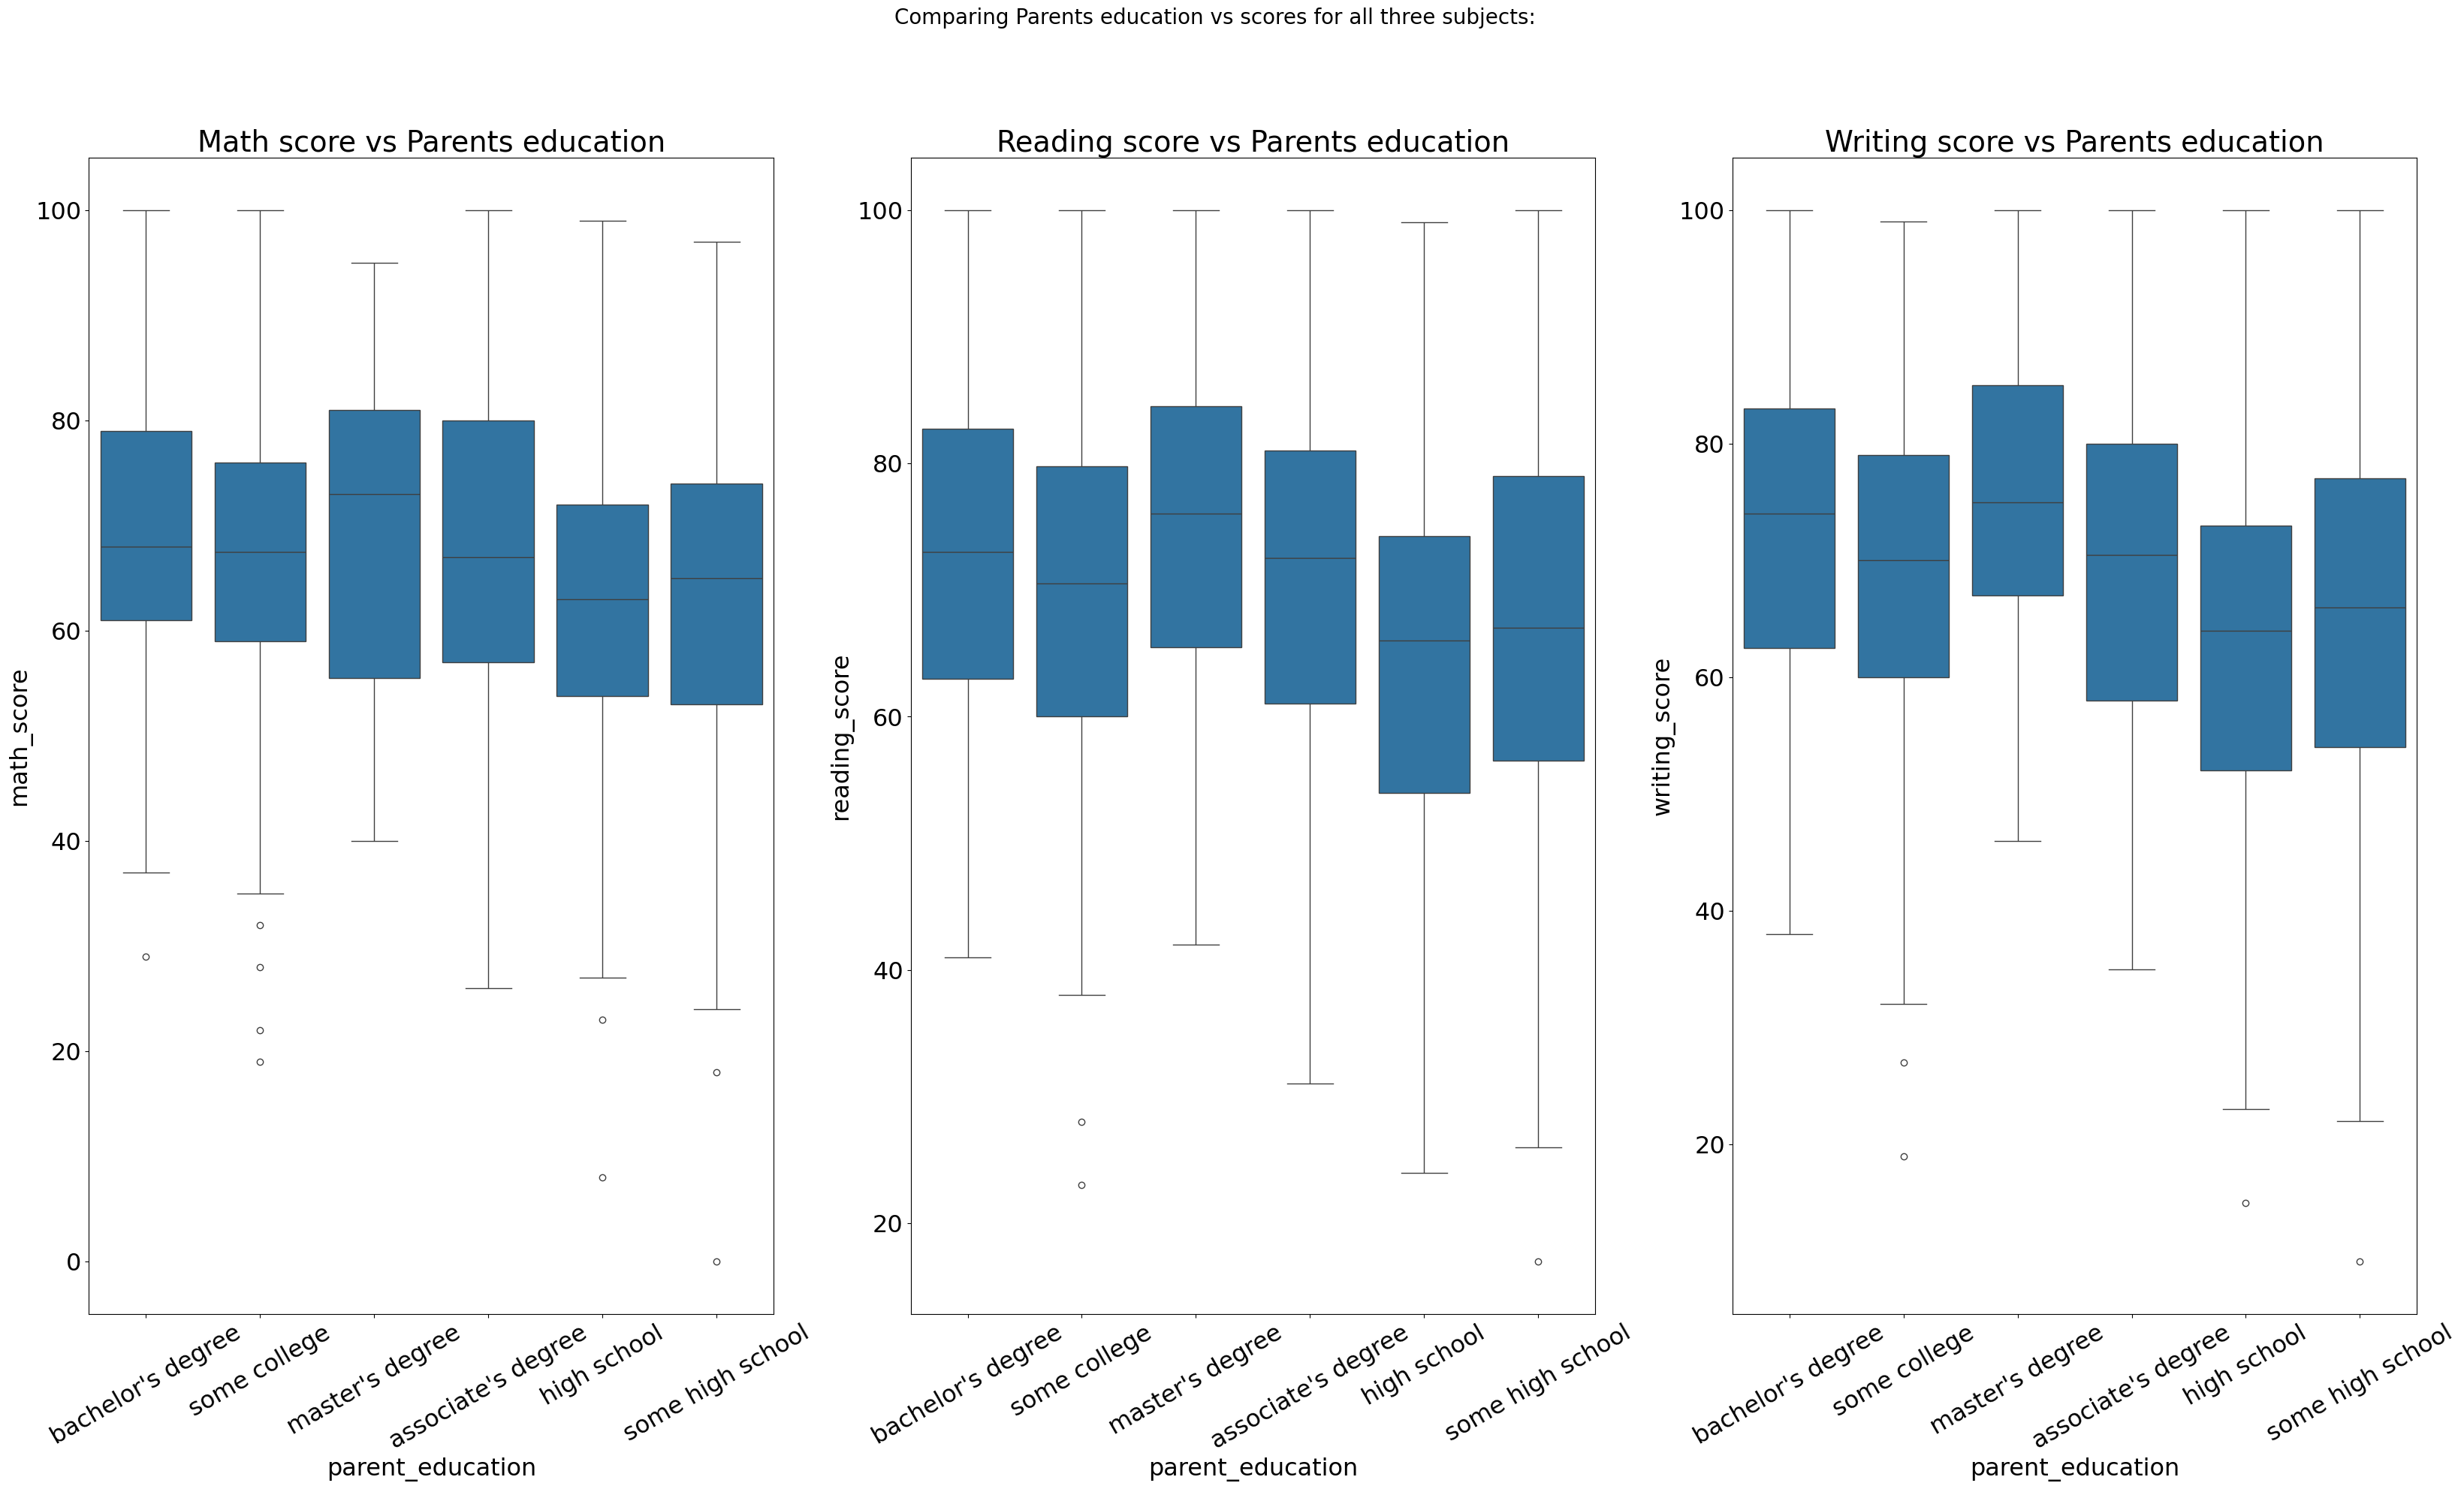

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Comparing Parents education vs scores for all three subjects:', fontsize=20)

# Math
sns.boxplot(x='parent_education', y='math_score', data=df, ax=ax1)
ax1.title.set_text('Math score vs Parents education')
var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

# Reading
sns.boxplot(x='parent_education', y='reading_score', data=df, ax=ax2)
ax2.title.set_text('Reading score vs Parents education')
var2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)

# Writing
sns.boxplot(x='parent_education', y='writing_score', data=df, ax=ax3)
ax3.title.set_text('Writing score vs Parents education')
var3 = ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)

In [47]:
jupyter nbconvert --to pdf notebook_name.ipynb


SyntaxError: invalid syntax (1008375104.py, line 1)